In [ ]:
# Copyright 2023 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# [TODO] Add your H1 title heading here

**_NOTE_**: This notebook has been tested in the following environment:

* Python version = 3.10.13

## Overview

{TODO: Include a paragraph or two explaining what this example demonstrates, who should be interested in it, and what you need to know before you get started.}

Learn more about [web-doc-title](linkback-to-webdoc-page). {TODO: if more than one primary feature, add tag/linkback for each one}

### Objective

In this tutorial, you learn how to {TODO: Complete the sentence explaining briefly what you will learn from the notebook, such as
training, hyperparameter tuning, or serving}:

This tutorial uses the following Google Cloud ML services and resources:

- *{TODO: Add high level bullets for the services/resources demonstrated; e.g., Vertex AI Training}*


The steps performed include:

- *{TODO: Add high level bullets for the steps of performed in the notebook}*

### Dataset

{TODO: Include a paragraph with Dataset information and where to obtain it.} 

{TODO: Make sure the dataset is accessible to the public. **Googlers**: Add your dataset to the [public samples bucket](http://goto/cloudsamples#sample-storage-bucket) within gs://cloud-samples-data/vertex-ai, if it doesn't already exist there.}

### Costs 

{TODO: Update the list of billable products that your tutorial uses.}

This tutorial uses billable components of Google Cloud:

* Vertex AI
* {TODO: BigQuery}
* Cloud Storage

{TODO: Include links to pricing documentation for each product you listed above.
 NOTE: If you use BigQuery or Dataflow, you need to add this to the pricing.
}

Learn about [Vertex AI pricing](https://cloud.google.com/vertex-ai/pricing),
{ TODO: [BigQuery pricing](https://cloud.google.com/bigquery/pricing), }
and [Cloud Storage pricing](https://cloud.google.com/storage/pricing), 
and use the [Pricing Calculator](https://cloud.google.com/products/calculator/)
to generate a cost estimate based on your projected usage.

## Installation

Install the following packages required to execute this notebook. 

{TODO: Suggest using the latest major GA version of each package; i.e., --upgrade}

In [ ]:
! pip3 install --upgrade --quiet google-cloud-aiplatform

## Before you begin

### Set up your Google Cloud project

**The following steps are required, regardless of your notebook environment.**

1. [Select or create a Google Cloud project](https://console.cloud.google.com/cloud-resource-manager). When you first create an account, you get a $300 free credit towards your compute/storage costs.

2. [Make sure that billing is enabled for your project](https://cloud.google.com/billing/docs/how-to/modify-project).

3. [Enable the Vertex AI API](https://console.cloud.google.com/flows/enableapi?apiid=aiplatform.googleapis.com). {TODO: Update the APIs needed for your tutorial. Edit the API names, and update the link to append the API IDs, separating each one with a comma. For example, container.googleapis.com,cloudbuild.googleapis.com}

4. If you are running this notebook locally, you need to install the [Cloud SDK](https://cloud.google.com/sdk).

#### Set your project ID

**If you don't know your project ID**, try the following:
* Run `gcloud config list`.
* Run `gcloud projects list`.
* See the support page: [Locate the project ID](https://support.google.com/googleapi/answer/7014113)

In [ ]:
PROJECT_ID = "[your-project-id]"  # @param {type:"string"}

# Set the project id
! gcloud config set project {PROJECT_ID}

#### Region

You can also change the `REGION` variable used by Vertex AI. Learn more about [Vertex AI regions](https://cloud.google.com/vertex-ai/docs/general/locations).

In [1]:
REGION = "us-central1"  # @param {type: "string"}

### Authenticate your Google Cloud account

The Cloud SDK, code and other libraries currently run as the service account identity of the Workbench Instance running this notebook.

**- Authenticate the Cloud SDK with your credentials :**

In [2]:
# ! gcloud auth login

**- Authenticate code and libraries with your credentials :**

In [ ]:
# ! gcloud auth application-default

**- Service account or other**
* See how to grant Cloud Storage permissions to your service account at https://cloud.google.com/storage/docs/gsutil/commands/iam#ch-examples.

### Create a Cloud Storage bucket

Create a storage bucket to store intermediate artifacts such as datasets.

- *{Note to notebook author: For any user-provided strings that need to be unique (like bucket names or model ID's), append "-unique" to the end so proper testing can occur}*

In [ ]:
BUCKET_URI = f"gs://your-bucket-name-{PROJECT_ID}-unique"  # @param {type:"string"}

**Only if your bucket doesn't already exist**: Run the following cell to create your Cloud Storage bucket.

In [ ]:
! gsutil mb -l {REGION} -p {PROJECT_ID} {BUCKET_URI}

### Import libraries

In [ ]:
from google.cloud import aiplatform

### Initialize Vertex AI SDK for Python

Initialize the Vertex AI SDK for Python for your project.

In [ ]:
aiplatform.init(project=PROJECT_ID, location=REGION, staging_bucket=BUCKET_URI)

## Cleaning up

To clean up all Google Cloud resources used in this project, you can [delete the Google Cloud
project](https://cloud.google.com/resource-manager/docs/creating-managing-projects#shutting_down_projects) you used for the tutorial.

Otherwise, you can delete the individual resources you created in this tutorial:

{TODO: Include commands to delete individual resources below}

In [1]:
import os

# Delete endpoint resource
# e.g. `endpoint.delete()`

# Delete model resource
# e.g. `model.delete()`

# Delete Cloud Storage objects that were created
delete_bucket = False
if delete_bucket or os.getenv("IS_TESTING"):
    ! gsutil -m rm -r $BUCKET_URI

In [1]:
!pip install google-cloud-aiplatform

In [2]:
import vertexai
vertexai.init()

In [11]:
from vertexai.language_models import TextEmbeddingModel
embedding_model=TextEmbeddingModel.from_pretrained('text-embedding-004')

Below command returns a list with a single text embedding object. That list contains 768 items, in the form of numbers between -1 and 1, called dimensions. These dimensions are used to compare similarity between embeddings.

In [12]:
embedding=embedding_model.get_embeddings(['life'])
print(embedding)

[TextEmbedding(values=[-0.010603697039186954, -0.015785258263349533, -0.010502871125936508, 0.002185781253501773, -0.07148707658052444, 0.04219384118914604, -0.010504273697733879, 0.03097270429134369, 0.03328254073858261, 0.05283762887120247, -0.004809410311281681, -0.0398193821310997, 0.07342298328876495, -0.04157464578747749, -0.0064167664386332035, -0.09088578075170517, -0.049317650496959686, -0.030094314366579056, -0.061477649956941605, -0.03391197696328163, 0.037252277135849, 0.011168363504111767, 0.023280510678887367, -0.02333776280283928, -0.0038556549698114395, -0.0060250903479754925, -0.02745829150080681, 0.014007600955665112, 0.018123144283890724, -0.024052545428276062, 0.016361013054847717, -0.00881562102586031, 0.0010356297716498375, 0.022376632317900658, 0.06061168387532234, -0.006580675952136517, -0.06944117695093155, 0.0012955393176525831, -0.026413124054670334, -0.08057834208011627, -0.01334639173001051, -0.023707639425992966, 0.013900559395551682, 0.02601812407374382, 

Explore the embedding generated by printing the lenght and the first 10 values.

In [8]:
vector=embedding[0].values
print(f"Length={len(vector)}")
print(vector[:10])

Length=768
[-0.010603697039186954, -0.015785258263349533, -0.010502871125936508, 0.002185781253501773, -0.07148707658052444, 0.04219384118914604, -0.010504273697733879, 0.03097270429134369, 0.03328254073858261, 0.05283762887120247]


## Generate a sentence embedding.

In [15]:
sentence_embedding = embedding_model.get_embeddings(['What is the meaning of life?'])

In [16]:
vector = sentence_embedding[0].values
print(f"Length = {len(vector)}")
print(vector[:10])

Length = 768
[-0.010626512579619884, 0.019580397754907608, 0.020961495116353035, 0.0007800217717885971, -0.06189257651567459, 0.014572087675333023, -0.0022393004037439823, 0.013389108702540398, 0.014531472697854042, 0.022664014250040054]


# Task 3. Calculate the similarity from embeddings

In [17]:
from sklearn.metrics.pairwise import cosine_similarity

### Create 3 embeddings for 3 different sentences, so that we can compare them to each other.

In [23]:
emb_1 = embedding_model.get_embeddings(['Who is vasudeva?'])
emb_2 = embedding_model.get_embeddings(['krishna lifted govarthan mountain for 7 days'])
emb_3 = embedding_model.get_embeddings(['krishna is supreme lord'])

vec_1 = [emb_1[0].values]
vec_2 = [emb_2[0].values]
vec_3 = [emb_3[0].values]

Note: the reason we wrap the embeddings (a Python list) in another list is because the cosine_similarity function expects either a 2D numpy array or a list of lists.

In [24]:
print(cosine_similarity(vec_1,vec_2)) 
print(cosine_similarity(vec_2,vec_3))
print(cosine_similarity(vec_1,vec_3))

[[0.44760961]]
[[0.55410951]]
[[0.49737288]]


## Task 4. Visualizing Embedddings
In this task, we will create embeddings for several sentences. Then we will reduce the dimensions from 768 to only 2, so that we can visualize the vectors in plot. We will see graphically that similar vectors are represented closer to one another.

In [25]:
in_1 = "Missing flamingo discovered at swimming pool"
in_2 = "Sea otter spotted on surfboard by beach"
in_3 = "Baby panda enjoys boat ride"
in_4 = "Breakfast themed food truck beloved by all!"
in_5 = "New curry restaurant aims to please!"
in_6 = "Python developers are wonderful people"
in_7 = "TypeScript, C++ or Java? All are great!" 

input_text_lst_news = [in_1, in_2, in_3, in_4, in_5, in_6, in_7]

In [27]:
# get the embeddings for each of them
embeddings = []
for input_text in input_text_lst_news:
    emb = embedding_model.get_embeddings(
        [input_text])[0].values
    embeddings.append(emb)

In [29]:
# Store them in a 2D NumPy array, with one row for each embedding.
import numpy as np
embeddings_array = np.array(embeddings) 
print("Shape: " + str(embeddings_array.shape))
print(embeddings_array)

Shape: (7, 768)
[[ 0.02803496 -0.00299724 -0.01659381 ... -0.01121059 -0.00519713
  -0.02044056]
 [ 0.00485451  0.03049659 -0.01399871 ... -0.01616582 -0.03072107
   0.01834136]
 [ 0.03935665 -0.03734451 -0.06938332 ... -0.02096844 -0.01913369
   0.02881981]
 ...
 [ 0.00716709 -0.05124414  0.01775808 ...  0.00892509 -0.00407107
   0.00254001]
 [ 0.03583142 -0.05428725  0.00165318 ... -0.01935553  0.04669554
   0.02359349]
 [ 0.05533755 -0.0237293  -0.03609464 ... -0.03040388  0.02278006
   0.01252656]]


### Reduce embeddings from 768 to 2 dimensions so that we can visualize them. We'll use principal component analysis (PCA).

In [30]:
from sklearn.decomposition import PCA

# Perform PCA for 2D visualization
PCA_model = PCA(n_components = 2)
PCA_model.fit(embeddings_array)
new_values = PCA_model.transform(embeddings_array)

In [31]:
print("Shape: " + str(new_values.shape))
print(new_values)

Shape: (7, 2)
[[ 0.49533001  0.17530328]
 [ 0.47394037  0.16537099]
 [ 0.34864739  0.11626409]
 [-0.01331229 -0.5433861 ]
 [-0.22950727 -0.56127286]
 [-0.4674816   0.36944202]
 [-0.60761662  0.27827859]]


In [33]:
#install visualization libraries
!pip install ipympl plot-utils matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 48.6 MB/s eta 0:00:0000:01


### Visualize the output.

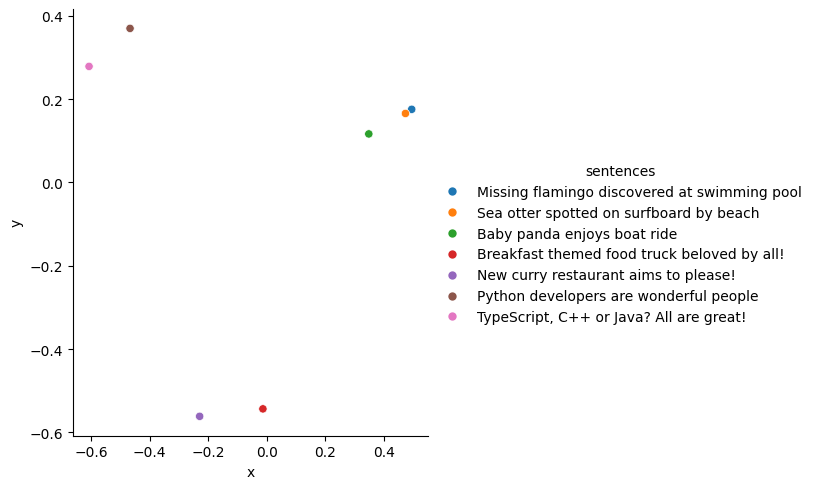

In [34]:
import seaborn as sns
import pandas as pd

data = pd.DataFrame({ 'x':new_values[:,0], 'y':new_values[:,1], 'sentences': input_text_lst_news})

# Create a visualization
sns.relplot(
    data,
    x='x',
    y='y',
    kind='scatter',
    hue='sentences'
)